In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
pip install seaborn

     |████████████████████████████████| 292 kB 964 kB/s eta 0:00:01
     |██████████▋                     | 10.9 MB 326 kB/s eta 0:01:08

In [ ]:
df = pd.read_csv("drinks/drinks.csv")

In [5]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [6]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [1]:
df.head()

NameError: name 'df' is not defined

In [6]:
df.tail(2)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [11]:
df["continent"].value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

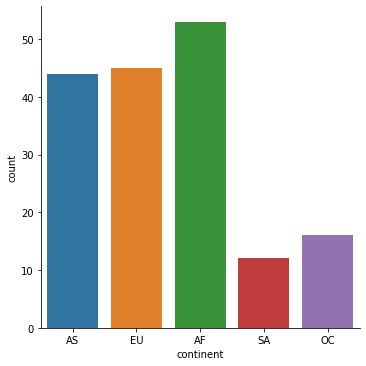

In [15]:
sns.catplot(data=df, x="continent", kind="count")

In [16]:
df.mean()

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [22]:
df.sum()

country                         AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer_servings                                                               20489
spirit_servings                                                             15632
wine_servings                                                                9544
total_litres_of_pure_alcohol                                                910.4
dtype: object

In [19]:
df.groupby("continent").mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [21]:
df.sort_values("beer_servings", ascending=False)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,AF
45,Czech Republic,361,170,134,11.8,EU
62,Gabon,347,98,59,8.9,AF
65,Germany,346,117,175,11.3,EU
98,Lithuania,343,244,56,12.9,EU
...,...,...,...,...,...,...
107,Mauritania,0,0,0,0.0,AF
158,Somalia,0,0,0,0.0,AF
111,Monaco,0,0,0,0.0,EU
128,Pakistan,0,0,0,0.0,AS


In [47]:
mean_by_continent = df.groupby("continent").mean()
mean_by_continent = mean_by_continent.drop(columns="total_litres_of_pure_alcohol")
# mean_by_continent["total"] = mean_by_continent.sum(axis=1)
mean_by_continent["total"] = mean_by_continent["beer_servings"] + mean_by_continent["spirit_servings"] + mean_by_continent["wine_servings"]

#for column in ["beer_servings", "spirit_servings", "wine_servings"]:
#    mean_by_continent[column] = mean_by_continent[column] / mean_by_continent["total"]

for column in [c for c in mean_by_continent.columns if "_servings" in c]:
    mean_by_continent[column] /= mean_by_continent["total"]

mean_by_continent

,beer_servings,spirit_servings,wine_servings,total
continent,,,,
AF,0.653430,0.173686,0.172884,94.075472
AS,0.346366,0.568848,0.084785,106.954545
EU,0.413564,0.282903,0.303533,468.555556
OC,0.488095,0.318027,0.193878,183.750000
SA,0.497043,0.325763,0.177194,352.250000


In [48]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [61]:
df.loc[df["continent"] == "AS", :]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
12,Bahrain,42,63,7,2.0,AS
13,Bangladesh,0,0,0,0.0,AS
19,Bhutan,23,0,0,0.4,AS
24,Brunei,31,2,1,0.6,AS
30,Cambodia,57,65,1,2.2,AS
36,China,79,192,8,5.0,AS
46,North Korea,0,0,0,0.0,AS
77,India,9,114,0,2.2,AS
78,Indonesia,5,1,0,0.1,AS


In [65]:
df.loc[df["beer_servings"] >= 100, :]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
8,Australia,261,72,212,10.4,OC
...,...,...,...,...,...,...
182,United Kingdom,219,126,195,10.4,EU
184,USA,249,158,84,8.7,NaN
185,Uruguay,115,35,220,6.6,SA
188,Venezuela,333,100,3,7.7,SA
